### Table of contents
01. Importing Libraries and Functions
02. Importing Data Set
03. Quick Review of Data Frames and dropping index column
04. Creating Graphics

# 01. Importing Libraries and Functions

In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data Sets

In [22]:
# cleaned flight data with all NaN values removed which inadvertantly removes all cancelled and diverted flights. Delays can still be assessed
delays = pd.read_csv('/Users/tuor/DA Projects/230523 Airline January 2023 Project/02 Data/Prepared Data/230616 2019 delayed with flight time.csv')

# 03. Quick Review of Data Frames

In [23]:
delays.isnull().sum()

Unnamed: 0                 0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
OP_UNIQUE_CARRIER          0
OP_CARRIER                 0
TAIL_NUM                   0
OP_CARRIER_FL_NUM          0
ORIGIN                     0
DEST                       0
DEP_TIME                   0
DEP_DEL15                  0
DEP_TIME_BLK               0
ARR_TIME                   0
ARR_DEL15                  0
DISTANCE                   0
ORIGIN_CITY                0
ORIGIN_STATE_OR_REGION     0
ORIGIN_FULL_NAME          41
GMT_DEP                    0
DEST_CITY                  0
DEST_STATE_OR_REGION       0
DEST_FULL_NAME            41
GMT_ARR                    0
dep_hour                   0
arr_hour                   0
flt_time_min               0
ORIGIN/DEST                0
dtype: int64

In [24]:
pd.set_option('display.max_columns', None)

In [25]:
delays.head()

,Unnamed: 0,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE,ORIGIN_CITY,ORIGIN_STATE_OR_REGION,ORIGIN_FULL_NAME,GMT_DEP,DEST_CITY,DEST_STATE_OR_REGION,DEST_FULL_NAME,GMT_ARR,dep_hour,arr_hour,flt_time_min,ORIGIN/DEST
0,0,1,2,9E,9E,N8688C,3280,GNV,ATL,601,0.0,0600-0659,722,0.0,300.0,Gainesville,FL,Florida,5,Atlanta,GA,Georgia,5,6,7,81.0,GNVATL
1,1,1,2,9E,9E,N348PQ,3281,MSP,CVG,1359,0.0,1400-1459,1633,0.0,596.0,Minneapolis,MN,Minnesota,6,Cincinnati,OH,Ohio,5,13,16,94.0,MSPCVG
2,2,1,2,9E,9E,N8896A,3282,DTW,CVG,1215,0.0,1200-1259,1329,0.0,229.0,Detroit,MI,Michigan,5,Cincinnati,OH,Ohio,5,12,13,74.0,DTWCVG
3,3,1,2,9E,9E,N8886A,3283,TLH,ATL,1521,0.0,1500-1559,1625,0.0,223.0,Tallahassee,FL,Florida,5,Atlanta,GA,Georgia,5,15,16,64.0,TLHATL
4,4,1,2,9E,9E,N8974C,3284,ATL,FSM,1847,0.0,1900-1959,1940,0.0,579.0,Atlanta,GA,Georgia,5,Fort Smith,AR,Arkansas,6,18,19,113.0,ATLFSM


# 04. Delay Relationship investigation

In [26]:
# removing columns to only look at the correlation chart values 
delays = delays.drop(['Unnamed: 0'], axis=1)

In [27]:
delays = delays[['DAY_OF_MONTH','DAY_OF_WEEK','OP_CARRIER_FL_NUM','ORIGIN_STATE_OR_REGION','DISTANCE','ARR_DEL15','DEP_DEL15', 'flt_time_min', 'DEP_TIME']]

#successful, cancelled, diverted flight data with emphasis on delays vs day of month
delays_dvday = delays[['DAY_OF_MONTH','DAY_OF_WEEK','ARR_DEL15','DEP_DEL15', 'flt_time_min', 'DEP_TIME']]

In [28]:
#successful, cancelled, diverted flight data with emphasis on cancelled vs day of month
delays_dvday = delays_dvday.groupby(['DAY_OF_MONTH','DAY_OF_WEEK'])[['ARR_DEL15','DEP_DEL15']].sum()

In [29]:
#for scatter plot
delays_dvday

,,ARR_DEL15,DEP_DEL15
DAY_OF_MONTH,DAY_OF_WEEK,,
1,2,4595.0,4367.0
2,3,6058.0,5770.0
3,4,3862.0,3983.0
4,5,2668.0,2835.0
5,6,2895.0,2853.0
6,7,4068.0,3991.0
7,1,3320.0,3057.0
8,2,2023.0,2040.0
9,3,2153.0,1970.0


In [30]:
delays.corr()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,DISTANCE,ARR_DEL15,DEP_DEL15,flt_time_min,DEP_TIME
DAY_OF_MONTH,1.000000,-0.018745,-0.015907,-0.013974,0.051039,0.040276,-0.001095,0.000283
DAY_OF_WEEK,-0.018745,1.000000,0.057082,0.016140,-0.002668,-0.004997,0.012744,0.003324
OP_CARRIER_FL_NUM,-0.015907,0.057082,1.000000,-0.351834,0.041815,0.027956,-0.305316,0.009056
DISTANCE,-0.013974,0.016140,-0.351834,1.000000,-0.002382,0.007592,0.958821,-0.028543
ARR_DEL15,0.051039,-0.002668,0.041815,-0.002382,1.000000,0.721226,0.084022,0.148783
DEP_DEL15,0.040276,-0.004997,0.027956,0.007592,0.721226,1.000000,0.024499,0.195226
flt_time_min,-0.001095,0.012744,-0.305316,0.958821,0.084022,0.024499,1.000000,-0.045146
DEP_TIME,0.000283,0.003324,0.009056,-0.028543,0.148783,0.195226,-0.045146,1.000000


Text(0.5, 1.0, 'Flight Data Correlations')

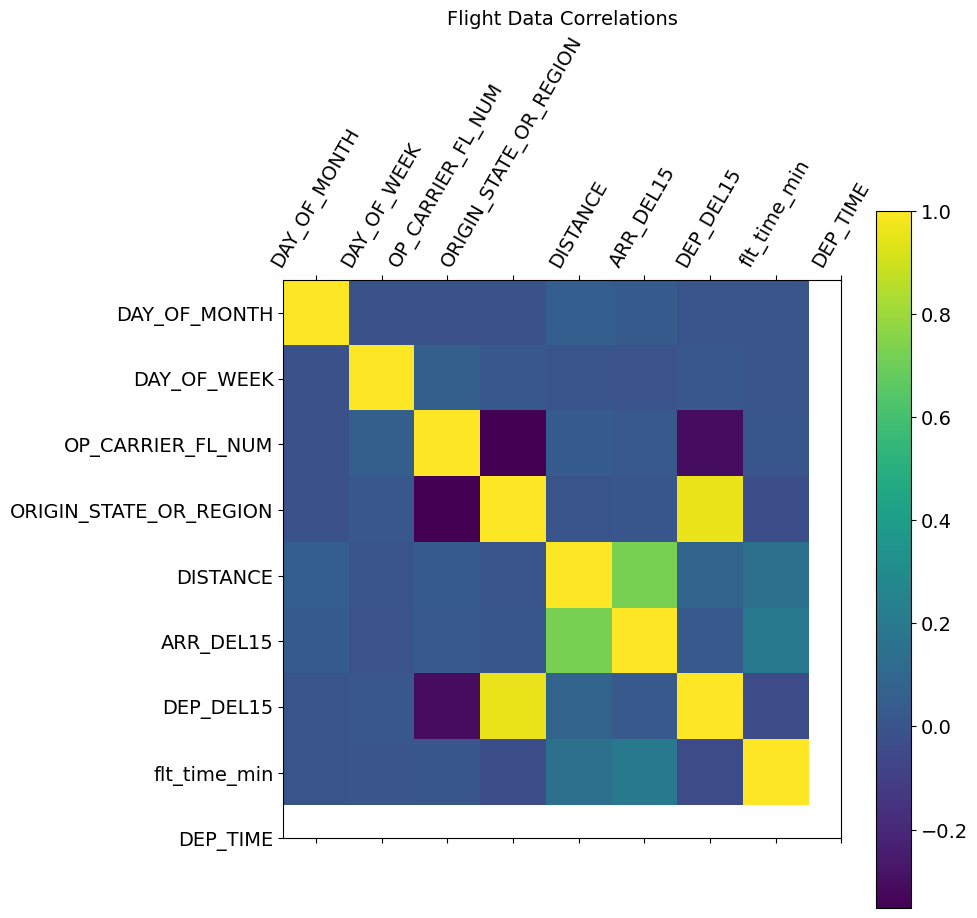

In [31]:
#plot for delayed flight data
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(9, 9)) # figure size 
plt.matshow(delays.corr(), fignum=f.number) # type of plot
plt.xticks(range(delays.shape[1]), delays.columns, fontsize=14, rotation=60) # x axis labels
plt.yticks(range(delays.shape[1]), delays.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Flight Data Correlations', fontsize=14) # add title

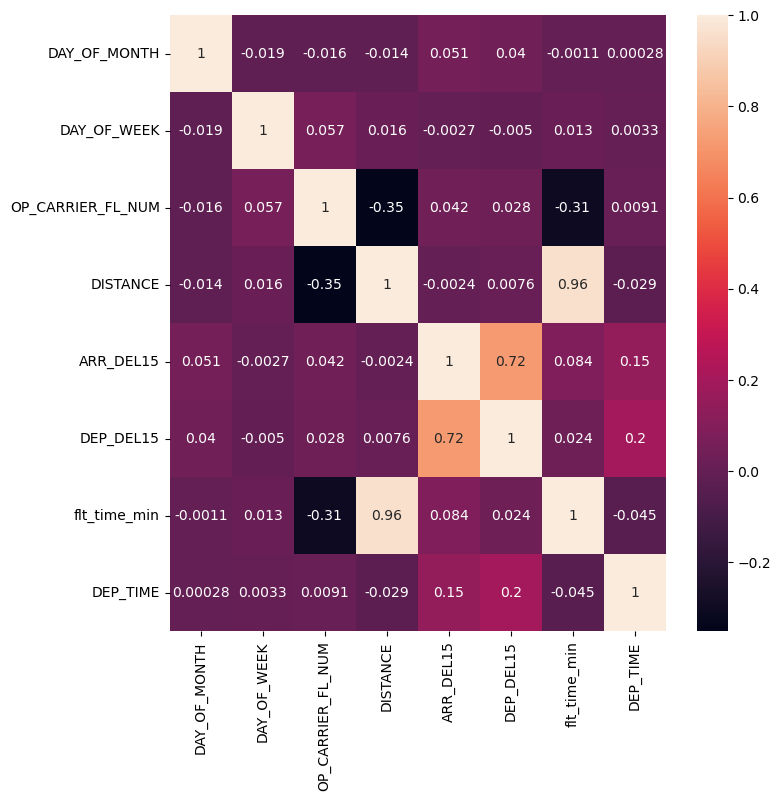

In [32]:
#plot for successful, canceled and diverted flight data
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(delays.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In general there are week positive correlations in the Flight Data Correlation Plot. The strongest seen is between cancelled flights and the day of the month. As the day of the month increases the likelyhood of a canceled flight also increases. The strongest relationship however is a negative correlation between distance flow and Carrier flight numbers, which would indicate as one increases the other decreases, but this insight goes beyond this projects scope.

In [33]:
# resetting the index
delays_dvday = delays_dvday.reset_index()

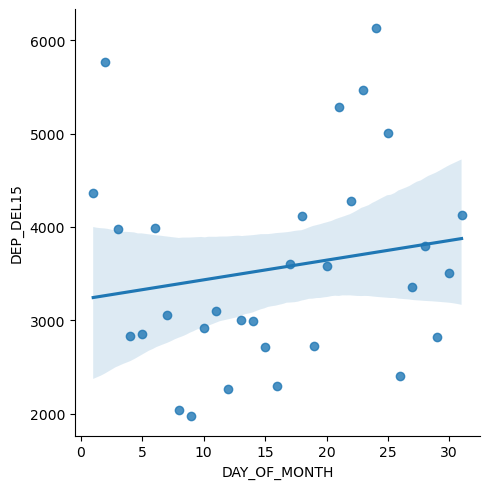

In [34]:
# Create a scatterplot for the "DAY_OF_MONTH" and "CANCELLED" columns in seaborn

sns.lmplot(x = 'DAY_OF_MONTH', y = 'DEP_DEL15', data = delays_dvday)


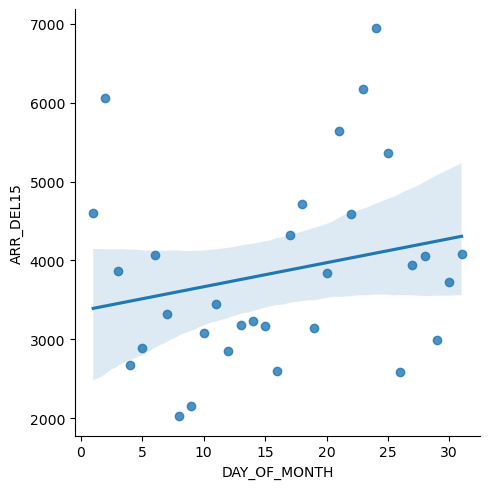

In [35]:
# Create a scatterplot for the "DAY_OF_MONTH" and "CANCELLED" columns in seaborn

sns.lmplot(x = 'DAY_OF_MONTH', y = 'ARR_DEL15', data = delays_dvday)


Early in the month the number of cancelations that occur seeems to have a relatively tight trend with a slight upward correlation. Later days have a more sporatic number of cancellations, but also the highest recorded.

In [36]:
scd_cvday = scd_cvday.drop(['index'],axis=1)

NameError: name 'scd_cvday' is not defined

In [ ]:
# Create a pair plot 

g = sns.pairplot(delays_dvday)

In [ ]:
#Visual of flight departure delays by number per day to assess the categories
sns.histplot(delays_dvday['DEP_DEL15'], bins = 30, kde = True)

In [ ]:
delays_dvday.loc[delays_dvday['DEP_DEL15'] < 3000, 'DEP_DEL15_QUANTITY'] = 'low'

In [ ]:
delays_dvday.loc[(delays_dvday['DEP_DEL15'] >= 3000) & (delays_dvday['DEP_DEL15'] < 5000), 'DEP_DEL15_QUANTITY'] = 'medium'

In [ ]:
delays_dvday.loc[delays_dvday['DEP_DEL15'] >= 5000, 'DEP_DEL15_QUANTITY'] = 'high'

In [ ]:
delays_dvday['DEP_DEL15_QUANTITY'].value_counts(dropna = False)

In [ ]:
# Create a categorical plot in seaborn using CANCELLED_QUANTITY created above

sns.set(style="ticks")
g = sns.catplot(x="DAY_OF_MONTH", y="DEP_DEL15", hue="DEP_DEL15_QUANTITY", data=delays_dvday,)
g.fig.set_size_inches(10, 6) # keeping numbers from overlapping

Mid to end of month has the highest number of cancellations with the general pattern being increase in number of cancelations as the month goes along.

### Intial questions that can be answered.

What does the month of January look like from start to finish?
    - First 11 days maintained the low end of cancelations, then medium number for 7 non consecutive total days and then high number for 4 non-consecutive total days

Is there a weekly rythmn?
    - No clear pattern for one month of flights


### Hypotheses

As the number of flights grow in a day there is a growth in ratio of total flights to cancelled flights